In [1]:
using Gen

In [2]:
println("Hello World")

Hello World


In [3]:
using Pkg

In [4]:
# function to calculate the volume of a sphere
function sphere_vol(r)
    return 4/3*pi*r^3
end

sphere_vol (generic function with 1 method)

In [5]:
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

quadratic (generic function with 1 method)

In [6]:
function quadratic2(a::Float64, b::Float64, c::Float64)
    sqr_term = sqrt(b^2-4a*c)
    r1 = quadratic(a, sqr_term, b)
    r2 = quadratic(a, -sqr_term, b)
    r1, r2
end

quadratic2 (generic function with 1 method)

In [7]:
vol = sphere_vol(3)

113.09733552923254

In [8]:
using Printf

In [9]:
@printf "volume = %0.3f\n" vol

volume = 113.097


In [10]:
quad1, quad2 = quadratic2(2.0, -2.0, -12.0)

(3.0, -2.0)

In [11]:
@printf "result 1: %f" quad1

result 1: 3.000000

In [12]:
println("result 2: ", quad2)

result 2: -2.0


In [13]:
s1 = "The quick brown fox jumps over the lazy dog α, β, γ"

"The quick brown fox jumps over the lazy dog α, β, γ"

In [14]:
println(s1)

The quick brown fox jumps over the lazy dog α, β, γ


In [15]:
c1 = 'a'

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [16]:
println(c1)

a


In [17]:
# the ascii value of a character
println(c1, " ascii value = ", Int(c1))

a ascii value = 97


In [18]:
println("Int('α') == ", Int('α'))

Int('α') == 945


In [19]:
println(Int('1'))

49


In [20]:
s1_caps = uppercase(s1)
s1_lower = lowercase(s1)
println(s1_caps, "\n", s1_lower)

THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG Α, Β, Γ
the quick brown fox jumps over the lazy dog α, β, γ


In [21]:
show(s1[11]); println()

'b'


In [22]:
show(s1[1:10]); println()

"The quick "


In [23]:
show(s1[end-10:end]); println()

"g α, β, γ"


In [24]:
a = "welcome"
b = "julia"
println("$a to $b")

welcome to julia


In [25]:
println("1 + 2 = $(1+2)")

1 + 2 = 3


In [26]:
s2 = "this" * "and" * "that"
println(s2)

thisandthat


In [27]:
s3 = string("this", " and", " that")

"this and that"

In [28]:
e_str1 = "2.718"
e = parse(Float64, e_str1)

2.718

In [29]:
println(5e)

13.59


In [30]:
num_15 = parse(Int, "15")

15

In [31]:
println(3num_15)

45


In [32]:
@printf "e = %0.2f\n" e

e = 2.72


In [33]:
e_str2 = @sprintf("%0.3f", e)

"2.718"

In [34]:
println("e_str1 == e_str2: $(e_str1 == e_str2)")

e_str1 == e_str2: true


In [35]:
pi

π = 3.1415926535897...

In [36]:
float(pi)

3.141592653589793

In [37]:
i = findfirst(isequal('b'), s1)

11

In [38]:
r = findfirst("brown", s1)

11:15

In [39]:
r = replace(s1, "brown" => "red")

"The quick red fox jumps over the lazy dog α, β, γ"

In [40]:
r = eachmatch(r"[\w]{4,}", s1)

Base.RegexMatchIterator(r"[\w]{4,}", "The quick brown fox jumps over the lazy dog α, β, γ", false)

In [41]:
for i in r print("\"$(i.match)\" ") end

"quick" "brown" "jumps" "over" "lazy" 

In [42]:
r = collect(m.match for m = eachmatch(r"[\w]{4,}", s1))

5-element Vector{SubString{String}}:
 "quick"
 "brown"
 "jumps"
 "over"
 "lazy"

In [43]:
r = "hello"^3

"hellohellohello"

In [44]:
r = strip("hello ", ['h', ' '])

"ello"

In [45]:
r = strip("hellow, child, escape", ',')

"hellow, child, escape"

In [46]:
r = join(collect(1:10), " ")

"1 2 3 4 5 6 7 8 9 10"

In [47]:
function printsum(a)
    println(summary(a), ": ", repr(a))
end

printsum (generic function with 1 method)

In [48]:
a1 = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [49]:
printsum(a1)

3-element Vector{Int64}: [1, 2, 3]


In [50]:
a2 = []
printsum(a2)

0-element Vector{Any}: Any[]


In [51]:
a3 = Int64[]
printsum(a3)

0-element Vector{Int64}: Int64[]


In [52]:
a4 = 1:20
printsum(a4)

20-element UnitRange{Int64}: 1:20


In [53]:
a4 = collect(1:20)
printsum(a4)

20-element Vector{Int64}: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [54]:
a5 = [2^i for i = 1:10]
printsum(a5)

10-element Vector{Int64}: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [55]:
a6 = (Array{Int64, 1})[]

Vector{Int64}[]

In [56]:
printsum(a6)

0-element Vector{Vector{Int64}}: Vector{Int64}[]


In [57]:
push!(a1, 4)

4-element Vector{Int64}:
 1
 2
 3
 4

In [58]:
push!(a3, 1)

1-element Vector{Int64}:
 1

In [59]:
push!(a6, [1, 2, 3])

1-element Vector{Vector{Int64}}:
 [1, 2, 3]

In [60]:
a7 = repeat(a1, inner=[1], outer=[2])

8-element Vector{Int64}:
 1
 2
 3
 4
 1
 2
 3
 4

In [61]:
a7 = repeat(a1, inner=[3], outer=[1])

12-element Vector{Int64}:
 1
 1
 1
 2
 2
 2
 3
 3
 3
 4
 4
 4

In [62]:
a8 = repeat(collect(4:-1:1), inner=[1], outer=[2])

8-element Vector{Int64}:
 4
 3
 2
 1
 4
 3
 2
 1

In [63]:
m1 = hcat(repeat([1, 2], inner=[1], outer=[3*2]), 
            repeat([1, 2, 3], inner=[2], outer=[2]),
            repeat([1, 2, 3, 4], inner=[3], outer=[1]))

12×3 Matrix{Int64}:
 1  1  1
 2  1  1
 1  2  1
 2  2  2
 1  3  2
 2  3  2
 1  1  3
 2  1  3
 1  2  3
 2  2  4
 1  3  4
 2  3  4

In [64]:
printsum(m1)

12×3 Matrix{Int64}: [1 1 1; 2 1 1; 1 2 1; 2 2 2; 1 3 2; 2 3 2; 1 1 3; 2 1 3; 1 2 3; 2 2 4; 1 3 4; 2 3 4]


In [65]:
m2 = repeat(m1, 1, 2)

12×6 Matrix{Int64}:
 1  1  1  1  1  1
 2  1  1  2  1  1
 1  2  1  1  2  1
 2  2  2  2  2  2
 1  3  2  1  3  2
 2  3  2  2  3  2
 1  1  3  1  1  3
 2  1  3  2  1  3
 1  2  3  1  2  3
 2  2  4  2  2  4
 1  3  4  1  3  4
 2  3  4  2  3  4

In [66]:
println("size: ", size(m2))

size: (12, 6)


In [67]:
m3 = repeat(m1, 2, 1)

24×3 Matrix{Int64}:
 1  1  1
 2  1  1
 1  2  1
 2  2  2
 1  3  2
 2  3  2
 1  1  3
 2  1  3
 1  2  3
 2  2  4
 1  3  4
 2  3  4
 1  1  1
 2  1  1
 1  2  1
 2  2  2
 1  3  2
 2  3  2
 1  1  3
 2  1  3
 1  2  3
 2  2  4
 1  3  4
 2  3  4

In [68]:
m4 = [i+j+k for i=1:2, j=1:3, k=1:2]

2×3×2 Array{Int64, 3}:
[:, :, 1] =
 3  4  5
 4  5  6

[:, :, 2] =
 4  5  6
 5  6  7

In [69]:
m5 = ["Hi Im # $(i+2*(j-1 + 3*(k-1)))" for i=1:2, j=1:3, k=1:2]

2×3×2 Array{String, 3}:
[:, :, 1] =
 "Hi Im # 1"  "Hi Im # 3"  "Hi Im # 5"
 "Hi Im # 2"  "Hi Im # 4"  "Hi Im # 6"

[:, :, 2] =
 "Hi Im # 7"  "Hi Im # 9"   "Hi Im # 11"
 "Hi Im # 8"  "Hi Im # 10"  "Hi Im # 12"

In [70]:
sum(m4, dims=3)

2×3×1 Array{Int64, 3}:
[:, :, 1] =
 7   9  11
 9  11  13

In [71]:
sum(m4, dims=(1,3))

1×3×1 Array{Int64, 3}:
[:, :, 1] =
 16  20  24

In [72]:
maximum(m4, dims=2)

2×1×2 Array{Int64, 3}:
[:, :, 1] =
 5
 6

[:, :, 2] =
 6
 7

In [77]:
findmax(m4, dims=3)

([4 5 6; 6 6 7;;;], [CartesianIndex(1, 1, 1) CartesianIndex(1, 2, 2) CartesianIndex(1, 3, 1); CartesianIndex(2, 1, 1) CartesianIndex(2, 2, 2) CartesianIndex(2, 3, 2);;;])

In [74]:
m4[:,:,1] = rand(1:6,2,3)

2×3 Matrix{Int64}:
 4  3  6
 6  2  1

In [76]:
size(m4)

(2, 3, 2)

In [78]:
m4 .+ 3

2×3×2 Array{Int64, 3}:
[:, :, 1] =
 7  6  9
 9  5  4

[:, :, 2] =
 7  8   9
 8  9  10

In [79]:
m4 .+ [1,2]

2×3×2 Array{Int64, 3}:
[:, :, 1] =
 5  4  7
 8  4  3

[:, :, 2] =
 5  6  7
 7  8  9

In [80]:
m4

2×3×2 Array{Int64, 3}:
[:, :, 1] =
 4  3  6
 6  2  1

[:, :, 2] =
 4  5  6
 5  6  7

In [81]:
(m4 .+ [1,2]) - m4

2×3×2 Array{Int64, 3}:
[:, :, 1] =
 1  1  1
 2  2  2

[:, :, 2] =
 1  1  1
 2  2  2

In [82]:
size(m4)

(2, 3, 2)

In [84]:
rand(1:6, 2,3)

2×3 Matrix{Int64}:
 6  3  2
 2  5  5

In [86]:
a1 = Dict(1=>"one", 2=>"two")
printsum(a1)

Dict{Int64, String} with 2 entries: Dict(2 => "two", 1 => "one")


In [87]:
a1[3] = "three"
printsum(a1)

Dict{Int64, String} with 3 entries: Dict(2 => "two", 3 => "three", 1 => "one")


In [88]:
a2 = Dict{Int64, AbstractString}()

Dict{Int64, AbstractString}()

In [89]:
a2[0] = "zero"
printsum(a2)

Dict{Int64, AbstractString} with 1 entry: Dict{Int64, AbstractString}(0 => "zero")


In [90]:
a3 = Dict([i => @sprintf("%d", i) for i=1:10])

Dict{Int64, String} with 10 entries:
  5  => "5"
  4  => "4"
  6  => "6"
  7  => "7"
  2  => "2"
  10 => "10"
  9  => "9"
  8  => "8"
  3  => "3"
  1  => "1"

In [91]:
printsum(a3)

Dict{Int64, String} with 10 entries: Dict(5 => "5", 4 => "4", 6 => "6", 7 => "7", 2 => "2", 10 => "10", 9 => "9", 8 => "8", 3 => "3", 1 => "1")


In [92]:
println(haskey(a1, 1))

true


In [93]:
println(1 in keys(a1))

true


In [94]:
printsum(collect(keys(a1)))

3-element Vector{Int64}: [2, 3, 1]


In [95]:
printsum(collect(values(a1)))

3-element Vector{String}: ["two", "three", "one"]


In [96]:
a2 = collect(1:20)
for i in a2
    if i % 2 != 0
        continue
    end
    print(i, ", ")
    if i >= 8
        break
    end
end

2, 4, 6, 8, 

In [98]:
while !isempty(a2)
    print(pop!(a2), ", ")
end

20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 

In [100]:
d1 = Dict(1=>"one", 2=>"two", 3=>"three")
for k in sort(collect(keys(d1)))
    print(k, ": ", d1[k], ", ")
end

1: one, 2: two, 3: three, 

In [101]:
a3 = ["one", "two", "three"]
for (i, v) in enumerate(a3)
    print(i, ": ", v, ", ")
end

1: one, 2: two, 3: three, 

In [102]:
a4 = map((x) -> x^2, [1, 2, 3, 7])

4-element Vector{Int64}:
  1
  4
  9
 49

In [103]:
if true
    println("it's true")
else
    println("it's false")
end


it's true


In [104]:
1 == 1.

true

In [105]:
1 > 2

false

In [106]:
"foo" != "bar"

true

In [107]:
occursin("this", "this and that")

true

In [108]:
function checktype(x)
    if x isa Int
        println("Look! An Int")
    elseif x isa AbstractFloat
        println("Look! A Float!")
    elseif x isa Complex
        println("Whoa, that's a complex!")
    else
        println("I have no idea what that is")
    end
end

checktype (generic function with 1 method)

In [109]:
checktype(2)

Look! An Int


In [110]:
checktype(2.0)

Look! A Float!


In [111]:
checktype(sqrt(Complex(-2)))

Whoa, that's a complex!


In [112]:
checktype("who am I?")

I have no idea what that is


In [113]:
1 > 2 ? println("that's tru") : println("that's false")

that's false


In [114]:
noisy_sqrt(x) = x >= 0 ? sqrt(x) : "That's negative"

noisy_sqrt (generic function with 1 method)

In [115]:
noisy_sqrt(-2)

"That's negative"

In [116]:
noisy_sqrt(33)

5.744562646538029

In [117]:
everything = 42

42

In [118]:
everything < 100 && println("that's true")

that's true


In [119]:
everything == 100 && println("that's false")

false

In [120]:
everything > 0 && println("eat them apples")

eat them apples


In [121]:
mutable struct Person
    name::AbstractString
    male::Bool
    age::Float64
    children::Int
end

In [122]:
p = Person("Julia", false, 4, 0)

Person("Julia", false, 4.0, 0)

In [123]:
printsum(p)

Person: Person("Julia", false, 4.0, 0)


In [124]:
people = Person[]

Person[]

In [125]:
push!(people, p)

1-element Vector{Person}:
 Person("Julia", false, 4.0, 0)

In [126]:
mutable struct Family
    name::AbstractString
    members::Array{AbstractString, 1}
    extended::Bool
    Family(name::AbstractString) = new(name, AbstractString[], false)
    Family(name::AbstractString, members) = new(name, members, length(members) > 3)
end
    

In [127]:
fam1 = Family("blogs")

Family("blogs", AbstractString[], false)

In [128]:
fam2 = Family("jones", ["jake", "hallen", "marvel", "cage"])

Family("jones", AbstractString["jake", "hallen", "marvel", "cage"], true)

In [130]:
fname = "simple.dat"
open(fname, "r") do f
    for line in eachline(f)
        println(line)
    end
end

this is a simple file containing
text and numbers:
43.3
17


In [131]:
f = open(fname, "r")
show(readlines(f)); println()
close(f)

["this is a simple file containing", "text and numbers:", "43.3", "17"]


In [132]:
f = open(fname, "r")
fstring = read(f, String)

"this is a simple file containing\ntext and numbers:\n43.3\n17"

In [133]:
summary(fstring)

"58-codeunit String"

In [134]:
close(f)

In [135]:
outfile = "outfile.dat"
f = open(outfile, "w")
println(f, "some content")
print(f, "some more content")
print(f, " more content but on the same line")
close(f)

In [136]:
f = open(outfile, "r")
show(readlines(f))

["some content", "some more content more content but on the same line"]

In [137]:
close(f)

In [138]:
outfile_content = open(f->read(f, String), outfile, "r")

"some content\nsome more content more content but on the same line"

In [139]:
println(repr(outfile_content))

"some content\nsome more content more content but on the same line"


In [4]:
# We create a new environment to store the newly added packages etc. in a local directory
Pkg.activate("julia_by_example")

  Activating new project at `/gpfs/milgram/pi/yildirim/ilker/julia_by_example`


In [43]:
Pkg.add("Calculus")

   Resolving package versions...
  No Changes to `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Project.toml`
  No Changes to `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Manifest.toml`


In [8]:
using Calculus

In [10]:
derivative(x -> sin(x), 10)

-0.8390715285595487

In [11]:
Pkg.add("Plots")

   Resolving package versions...
   Installed Wayland_protocols_jll ──────── v1.25.0+0
   Installed Xorg_xcb_util_renderutil_jll ─ v0.3.9+1
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed FFMPEG ─────────────────────── v0.4.1
   Installed Showoff ────────────────────── v1.0.3
   Installed ColorTypes ─────────────────── v0.11.4
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Pixman_jll ─────────────────── v0.42.2+0
   Installed libass_jll ─────────────────── v0.15.1+0
   Installed XML2_jll ───────────────────── v2.10.3+0
   Installed Plots ──────────────────────── v1.38.17
   Installed Graphite2_jll ──────────────── v1.3.14+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed GR_jll ─────────────────────── v0.72.9+0
   Installed Xorg_libXext_jll ───────────── v1.3.4+4
   Installed Gettext_jll ────────────────── v0.21.0+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Instal

In [12]:
Pkg.update()

  No Changes to `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Project.toml`
  No Changes to `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Manifest.toml`


In [13]:
using Plots

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


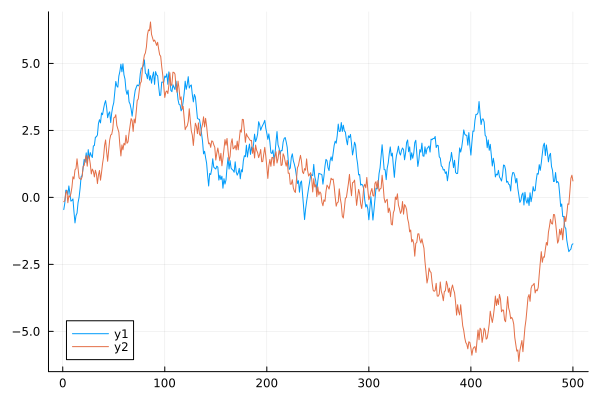

In [14]:
plot([cumsum(rand(500) .- .5), cumsum(rand(500) .- .5)])

In [15]:
savefig("plot.svg")

"/gpfs/milgram/pi/yildirim/ilker/plot.svg"

In [16]:
Pkg.add("DataFrames")

   Resolving package versions...
   Installed InvertedIndices ──── v1.3.0
   Installed SentinelArrays ───── v1.4.0
   Installed Crayons ──────────── v4.1.1
   Installed InlineStrings ────── v1.4.0
   Installed PooledArrays ─────── v1.4.2
   Installed StringManipulation ─ v0.3.0
   Installed DataFrames ───────── v1.6.1
   Installed PrettyTables ─────── v2.2.7
    Updating `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Project.toml`
  [a93c6f00] + DataFrames v1.6.1
    Updating `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.6.1
  [e2d170a0] + DataValueInterfaces v1.0.0
  [842dd82b] + InlineStrings v1.4.0
  [41ab1584] + InvertedIndices v1.3.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [2dfb63ee] + PooledArrays v1.4.2
  [08abe8d2] + PrettyTables v2.2.7
  [91c51154] + SentinelArrays v1.4.0
  [892a3eda] + StringManipulation v0.3.0
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.10.1
  [9fa8497

In [17]:
using DataFrames

In [18]:
df = DataFrame(A = [1, 2], B = [ℯ, π], C = ["xx", "xy"])

Row,A,B,C
,Int64,Float64,String
1,1,2.71828,xx
2,2,3.14159,xy


In [19]:
show(df)

2×3 DataFrame
 Row │ A      B        C      
     │ Int64  Float64  String 
─────┼────────────────────────
   1 │     1  2.71828  xx
   2 │     2  3.14159  xy

In [21]:
df[!, :B]

2-element Vector{Float64}:
 2.718281828459045
 3.141592653589793

In [22]:
df[1, :]

Row,A,B,C
,Int64,Float64,String
1,1,2.71828,xx


In [23]:
df[1, 1:2]

Row,A,B
,Int64,Float64
1,1,2.71828


In [24]:
Pkg.add("CSV")

   Resolving package versions...
   Installed WorkerUtilities ─ v1.6.1
   Installed WeakRefStrings ── v1.4.2
   Installed FilePathsBase ─── v0.9.20
   Installed CSV ───────────── v0.10.11
    Updating `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Project.toml`
  [336ed68f] + CSV v0.10.11
    Updating `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Manifest.toml`
  [336ed68f] + CSV v0.10.11
  [48062228] + FilePathsBase v0.9.20
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
Precompiling project...
  ✓ WorkerUtilities
  ✓ WeakRefStrings
  ✓ FilePathsBase
  ✓ CSV
  4 dependencies successfully precompiled in 25 seconds. 151 already precompiled.


In [28]:
using CSV

In [33]:
iris = CSV.read("iris.csv", DataFrame)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [34]:
Pkg.add("RData")

   Resolving package versions...
   Installed ExprTools ───────── v0.1.10
   Installed Mocking ─────────── v0.7.7
   Installed RData ───────────── v1.0.0
   Installed CategoricalArrays ─ v0.10.8
   Installed FileIO ──────────── v1.16.1
   Installed TimeZones ───────── v1.11.0
    Updating `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Project.toml`
  [df47a6cb] + RData v1.0.0
    Updating `/gpfs/milgram/pi/yildirim/ilker/julia_by_example/Manifest.toml`
  [324d7699] + CategoricalArrays v0.10.8
  [e2ba6199] + ExprTools v0.1.10
  [5789e2e9] + FileIO v1.16.1
  [78c3b35d] + Mocking v0.7.7
  [df47a6cb] + RData v1.0.0
  [f269a46b] + TimeZones v1.11.0
  [4af54fe1] + LazyArtifacts
    Building TimeZones → `./julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/5b347464bdac31eccfdbe1504d9484c31645cafc/build.log`
Precompiling project...
  ✓ ExprTools
  ✓ Mocking
  ✓ CategoricalArrays
  ✓ CategoricalArrays → CategoricalArraysSentinelArraysExt
  ✓ CategoricalArrays → CategoricalArraysJSONExt

In [35]:
names(iris)

5-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"
 "Species"

In [38]:
iris[!, :Species]

150-element PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [40]:
iris[iris[!, :Species] .== "setosa", :]

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
